# Make splits for task 2 (reaction extrapolation i.e. enzyme retrieval)

For reaction extrapolation, we want to test for how well each method can predict the reactions.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [33]:
reaction2EC = pd.read_csv('../processed_data/reaction2EC.csv')

reaction2EC['EC3'] = reaction2EC['EC number'].str.split('.').str[:3].str.join('.')
reaction2EC['EC2'] = reaction2EC['EC number'].str.split('.').str[:2].str.join('.')
reaction2EC['EC1'] = reaction2EC['EC number'].str.split('.').str[:1].str.join('.')
reaction2EC['Duplicated EC'] = reaction2EC['EC number'].duplicated(keep=False)
# reaction2EC ### Maybe include the ones that map to multiple ECs?
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},1.1.1,1.1,1,True
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True
...,...,...,...,...,...,...,...,...
59117,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...,NaN,7.6.2.8,NaN,7.6.2,7.6,7,True
59118,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...,NaN,7.6.2.8,NaN,7.6.2,7.6,7,True
59119,C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...,NaN,7.6.2.9,NaN,7.6.2,7.6,7,True
59120,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,NaN,7.6.2.9,NaN,7.6.2,7.6,7,True


(array([5.6291e+04, 1.7390e+03, 6.9300e+02, 1.5800e+02, 9.0000e+01,
        3.5000e+01, 0.0000e+00, 5.0000e+01, 0.0000e+00, 6.6000e+01]),
 array([ 1. ,  7.5, 14. , 20.5, 27. , 33.5, 40. , 46.5, 53. , 59.5, 66. ]),
 <a list of 10 Patch objects>)

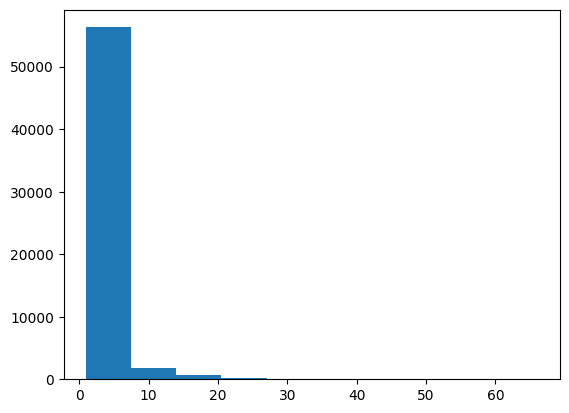

In [29]:
from collections import defaultdict
reaction_to_ec = defaultdict(list)
for reaction, ec in reaction2EC[['Reaction', 'EC number']].values:
    reaction_to_ec[reaction].append(ec)
reaction2EC['Reactions with a single EC'] = [len(reaction_to_ec.get(r)) for r in reaction2EC['Reaction'].values]
plt.hist(reaction2EC['Reactions with a single EC'])

In [31]:
#only keeps ECs with multiple example reactions
mapped = reaction2EC.dropna(subset='Mapped Reaction')
mapped = mapped[mapped['Reactions with a single EC'] == 1]
 #remove rows with no mapped reaction for test set building
unique_reactions_multiple_ec = mapped[mapped['Duplicated EC'] == True] 
unique_reactions_multiple_ec

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Duplicated EC,Reactions with a single EC
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,1
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,1.1.1,1.1,1,True,1
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,1
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,1.1.1,1.1,1,True,1
8,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,N-benzyl-4-piperidone + NADH + H+ = N-benzylpi...,1.1.1,1.1,1,True,1
...,...,...,...,...,...,...,...,...,...
58941,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,"ATP + UTP = P1-(5'-adenosyl),P4-(5'-uridinyl)t...",6.5.1,6.5,6,True,1
58945,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.3,"ATPgammaS + ATP = P1,P4-bis(5'-adenosyl) tetra...",6.5.1,6.5,6,True,1
58953,Nc1ccn([C@@H]2O[C@H](COP(=O)(O)O[C@H]3[C@@H](O...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",6.5.1,6.5,6,True,1
58954,C=C(C)CCOP(=O)(O)OP(=O)(O)OP(=O)(O)O.Nc1ncnc2c...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl triphosphate = isopentenyl-t...,6.5.1,6.5,6,True,1


### The hard test set will have a different test set

Technically this doesn't require it to be an EC with a duplicated reaction class
Cannot use the same ECs as the first split, otherwise all of the data will be held out

In [17]:
EC_df = pd.DataFrame({'EC number': unique_reactions_multiple_ec['EC number'].unique()})
EC_df['EC3'] = EC_df['EC number'].str.split('.').str[:3].str.join('.')
EC_df['EC2'] = EC_df['EC number'].str.split('.').str[:2].str.join('.')
EC_df['EC1'] = EC_df['EC number'].str.split('.').str[:1].str.join('.')

EC_df

,EC number,EC3,EC2,EC1
0,1.1.1.1,1.1.1,1.1,1
1,1.1.1.10,1.1.1,1.1,1
2,1.1.1.100,1.1.1,1.1,1
3,1.1.1.101,1.1.1,1.1,1
4,1.1.1.102,1.1.1,1.1,1
...,...,...,...,...
2375,6.4.1.1,6.4.1,6.4,6
2376,6.4.1.3,6.4.1,6.4,6
2377,6.4.1.4,6.4.1,6.4,6
2378,6.5.1.1,6.5.1,6.5,6


In [18]:
np.random.seed(42)
random.seed(42)
EC_grouped_df = EC_df.groupby('EC3').sample(1)[['EC3' , 'EC2', 'EC1']]
EC_grouped_df

,EC3,EC2,EC1
154,1.1.1,1.1,1
231,1.1.3,1.1,1
243,1.1.5,1.1,1
244,1.1.98,1.1,1
250,1.1.99,1.1,1
...,...,...,...
2368,6.3.3,6.3,6
2370,6.3.4,6.3,6
2374,6.3.5,6.3,6
2377,6.4.1,6.4,6


## Hard set generation

 For the hard set, reactions are held out unfiormly over level 2, but sampled from level 3, and then there is a random sample from this set.

## Filter for "hard reactions"

In [19]:
np.random.seed(42)
random.seed(42)

# Make sure they are evenly distributed over different EC2's
EC2_selected = EC_grouped_df.groupby('EC2').sample(1)
EC3s_hard = EC2_selected['EC3'].values
EC3s_hard #these are the ones to hold out at level 3

np.random.seed(42)
random.seed(42)

EC_df_selected = EC_df[EC_df['EC3'].isin(EC3s_hard)]
ECs = EC_df_selected.sample(frac=1).groupby("EC3").head(4)['EC number'].values #sample up to 4 if availalbe most ECs don't have that many examples at level 4
len(ECs)
hard_reactions = unique_reactions_multiple_ec[unique_reactions_multiple_ec['EC number'].isin(ECs)]
print(len(hard_reactions))
hard_test = hard_reactions.groupby('EC number').sample(1) # Select a single sample for testing (and then the rest will be training)
hard_test

2433


,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Reactions with a single EC,Duplicated EC
7442,CC(C)CC(O)C(=O)O.O=O>>CC(C)CC(=O)C(=O)O.OO,[CH3:1][CH:2]([CH3:3])[CH2:4][CH:5]([OH:6])[C:...,1.1.3.15,DL-2-hydroxyisocaproate + O2 = 2-oxoisocaproat...,1.1.3,1.1,1,1,True
7530,O=O.O=P(O)(O)OC[C@H](O)CO>>O=C(CO)COP(=O)(O)O.OO,[O:1]=[O:2].[O:3]=[P:4]([OH:5])([OH:6])[O:7][C...,1.1.3.21,sn-glycerol 3-phosphate + O2 = glycerone phosp...,1.1.3,1.1,1,1,True
7534,CC(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@H...,[CH3:1][C:2](=[O:3])[NH:4][C@@H:5]1[C@@H:6]([O...,1.1.3.29,N-acetyl-beta-D-glucosamine + O2 = N-acetyl-D-...,1.1.3,1.1,1,1,True
7577,O=O.OCC(O)CO>>O=CC(O)CO.OO,[O:1]=[O:2].[OH:3][CH2:4][CH:5]([OH:6])[CH2:7]...,1.1.3.41,glycerol + O2 = glyceraldehyde + H2O2,1.1.3,1.1,1,1,True
8079,O=C(O)[C@@H]1C=CCC2=C1N=C1CC=C[C@@H](C(=O)O)[C...,[O:1]=[C:2]([OH:3])[C@@H:4]1[CH:5]=[CH:6][CH2:...,1.10.3.16,"(1R,5aS,6R)-1,4,5,5a,6,9-hexahydrophenazine-1,...",1.10.3,1.10,1,1,True
...,...,...,...,...,...,...,...,...,...
58899,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.4.1.1,ATP + pyruvate + HCO3- = ADP + phosphate + oxa...,6.4.1,6.4,6,1,True
58901,CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)...,[CH3:1][CH2:2][C:3](=[O:4])[S:5][CH2:6][CH2:7]...,6.4.1.3,ATP + propanoyl-CoA + HCO3- = ADP + phosphate ...,6.4.1,6.4,6,1,True
58907,CC(C)=CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,[CH3:1][C:2]([CH3:3])=[CH:4][C:5](=[O:6])[S:7]...,6.4.1.4,ATP + 3-methylcrotonoyl-CoA + HCO3- = ADP + ph...,6.4.1,6.4,6,1,True
58925,N=c1[nH]c(=O)c2ncn([C@H]3C[C@H](O)[C@@H](COP(=...,[NH2:32][c:33]1[n:34][cH:35][n:36][c:37]2[c:38...,6.5.1.1,"ATP + dGTP = P1-(5'-adenosyl),P4-[5'-(2'-deoxy...",6.5.1,6.5,6,1,True


### The easy and medium test splits will share the same test set

Should probably correlate it so that some fothe reactions used in the hard test set are also used in the easy and medium
But the holdout sequences will be different

In [20]:
np.random.seed(42)
random.seed(42)
#remove the EC3s that were selected for the hard test
EC_df_nothard = EC_df[~EC_df['EC3'].isin(EC3s_hard)]

#sample a random one from each EC
EC_df_selected = EC_df_nothard.groupby('EC3').sample(1)
ECs = EC_df_selected['EC number'].values

# Get the reactions for these ECs
filtered = unique_reactions_multiple_ec[unique_reactions_multiple_ec['EC number'].isin(ECs)]

np.random.seed(42)
random.seed(42)
# Just get a sample from the ECs for reaction set 1
easy_test = filtered.groupby('EC number').sample(1)

# For the medium test, we want to remove a sample of level 4 EC numbers. 
np.random.seed(42)
random.seed(42)
# Here we know we're getting a different set to the ones from the hard set
medium_test = filtered.groupby('EC3').sample(1)

easy_medium_test = pd.concat([easy_test, medium_test]).sort_values('EC number')
easy_medium_test

,Reaction,Mapped Reaction,EC number,Reaction Text,EC3,EC2,EC1,Reactions with a single EC,Duplicated EC
5261,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.375,3-sulfopyruvate + NADPH = (2R)-3-sulfolactate ...,1.1.1,1.1,1,1,True
5261,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.375,3-sulfopyruvate + NADPH = (2R)-3-sulfolactate ...,1.1.1,1.1,1,1,True
7803,COC1=C(OC)C(=O)C(CC=C(C)CCC=C(C)CCC=C(C)CCC=C(...,[CH3:1][O:2][C:3]1=[C:4]([O:5][CH3:6])[C:7](=[...,1.1.5.3,sn-glycerol 3-phosphate + oxidized coenzyme Q ...,1.1.5,1.1,1,1,True
7803,COC1=C(OC)C(=O)C(CC=C(C)CCC=C(C)CCC=C(C)CCC=C(...,[CH3:1][O:2][C:3]1=[C:4]([O:5][CH3:6])[C:7](=[...,1.1.5.3,sn-glycerol 3-phosphate + oxidized coenzyme Q ...,1.1.5,1.1,1,1,True
7923,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,1.1.98.6,ATP + formate = dATP + CO2 + H2O,1.1.98,1.1,1,1,True
...,...,...,...,...,...,...,...,...,...
58798,C[C@H](C(=O)O)C1C[C@@H](C)[C@@H](C(=O)O)N1.Nc1...,[CH3:1][C@H:2]([C:3](=[O:4])[OH:5])[CH:6]1[CH2...,6.3.3.6,"ATP + (3R,6S)-2,6-dimethyl-t-carboxymethylprol...",6.3.3,6.3,6,1,True
58833,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@H](...,[CH3:1][CH2:2][C@H:3]([CH3:4])[C@H:5]([NH:6][C...,6.3.4.15,ATP + biotin + CGGGSGGGSGLNDIFEAQKIEWH = AMP +...,6.3.4,6.3,6,1,True
58833,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@H](...,[CH3:1][CH2:2][C@H:3]([CH3:4])[C@H:5]([NH:6][C...,6.3.4.15,ATP + biotin + CGGGSGGGSGLNDIFEAQKIEWH = AMP +...,6.3.4,6.3,6,1,True
58879,NC(=O)CC[C@H](N)C(=O)O.N[C@@H](CC(=O)O)C(=O)O....,[NH2:11][C@@H:12]([CH2:13][C:14](=[O:15])[OH:1...,6.3.5.4,GTP + L-Asp + L-Gln = GMP + diphosphate + Asn ...,6.3.5,6.3,6,1,True


## Now save the test splits

In [35]:
reaction2EC_easy_train = reaction2EC[~reaction2EC['Reaction'].isin(easy_medium_test['Reaction'])]
reaction2EC_medium_train = reaction2EC[~reaction2EC['EC number'].isin(easy_medium_test['EC number'])]
reaction2EC_hard_train = reaction2EC[~reaction2EC['EC3'].isin(hard_test['EC3'])]

easy_medium_test.to_csv('../splits/task2/easy_reaction_test.csv', index=False)
easy_medium_test.to_csv('../splits/task2/medium_reaction_test.csv', index=False)
hard_test.to_csv('../splits/task2/hard_reaction_test.csv', index=False)

reaction2EC_easy_train.to_csv('../splits/task2/easy_reaction_train.csv', index=False)
reaction2EC_medium_train.to_csv('../splits/task2/medium_reaction_train.csv', index=False)
reaction2EC_hard_train.to_csv('../splits/task2/hard_reaction_train.csv', index=False)

for set in [easy_medium_test, easy_medium_test, hard_test,reaction2EC_easy_train, reaction2EC_medium_train, reaction2EC_hard_train]:
    print(len(set))

226
226
163
59009
57181
41292


### For initial testing (remove later)

In [17]:
import pandas as pd
processed = pd.read_csv('../processed_data/protein2EC.csv')
aggregated = processed.groupby('Sequence').agg({'EC number': lambda x: list(x)}).reset_index()
#map back to the Entry as well
aggregated['Entry'] = aggregated['Sequence'].map(processed.drop_duplicates('Sequence').set_index('Sequence')['Entry'])
aggregated['EC number'] = aggregated['EC number'].apply(lambda x: ';'.join(x))
aggregated = aggregated[['Entry', 'EC number', 'Sequence']]
aggregated.to_csv('../processed_data/protein2EC_train.csv', index=False, sep='\t')

In [ ]:
price = pd.read_csv('../splits/task1/price_protein_test.csv')
price.to_csv('../splits/task1/price_protein_test.csv', index=False, sep='\t')